In [2]:
print("Hello World")

Hello World


In [3]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
""" Create a Test Set with consistency for multiple runs """ 
import hashlib #python library to create secure hash functions

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

""""This function creates a datasets/housing directory in your workspace, 
downloads the housing.tgz file, and extracts the housing.csv from it in this directory."""
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()



/var/folders/wf/_26j332d5xdf7jk1y8kfyddw0000gn/T/ipykernel_1743/1070975525.py:20: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [4]:
"""Function to load housing data in a Pandas DataFrame object containing all the data"""
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

"""Look at the top 5 rows"""
housing = load_housing_data() 
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
"""The info() method is useful to get a quick description of the data, in particular the
total number of rows, and each attribute’s type and number of non-null values"""
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


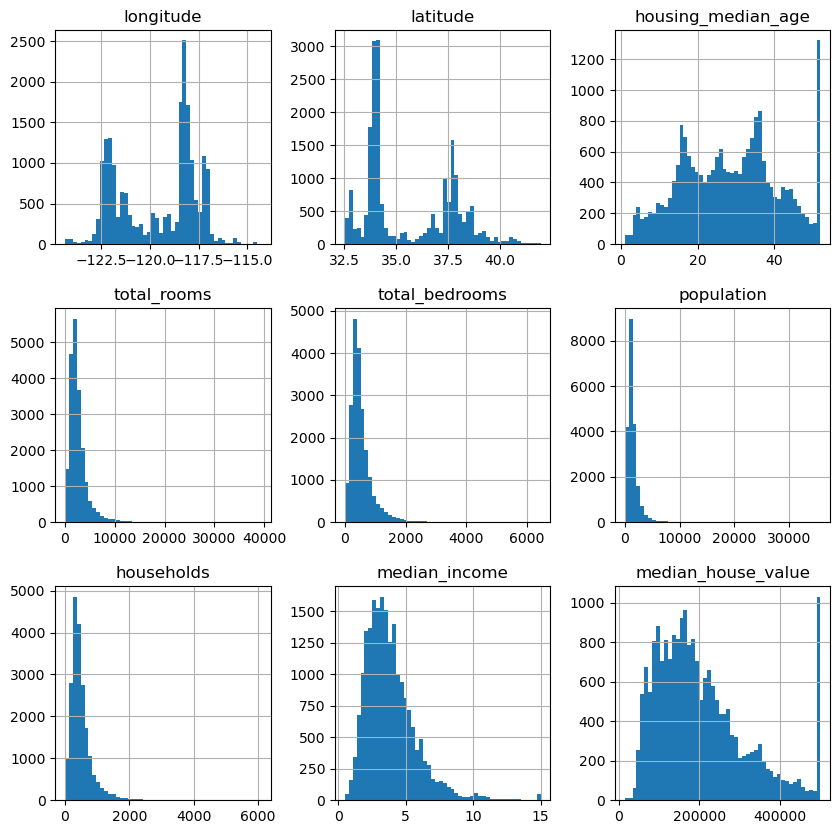

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(10,10))
plt.show()

In [9]:
""" Your brain is great at spotting patterns, we can easiy examine the data before testing the model. 
However, this is called overfitting. Overfitting is when we generalized data too much, making it too optimized
for just this specific data and not geneeralized for real-world data. """
import numpy as np

"""Creating a test set is theoretically quite simple: just pick some instances randomly,
typically 20% of the dataset, and set them aside:"""
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [11]:
"""BETTER SOLUTIONS FOR SPLITTING TEST TEST"""

"""This function determines whether a specific data point (identified by its identifier) 
should be included in the test set."""
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

"""This function uses test_set_check to split a dataset 
into training and test sets based on a unique identifier column."""
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [12]:
"""Unfortunately, the housing dataset does no have an id column 
The simplest solution is to use the row index as the ID"""
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [13]:
"""If you use the row index as a unique identifier, you need to make sure that new data
gets appended to the end of the dataset, and no row ever gets deleted. If this is not
possible, then you can try to use the most stable features to build a unique identifier.
For example, a district’s latitude and longitude are guaranteed to be stable for a few
million years, so you could combine them into an ID like so:"""
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [14]:
"""Skikit-Learn has a function called train_test_split, which behaves like
our function split_train_test defined realier"""
from sklearn.model_selection import train_test_split 

#random_state parameter allows you to set random generator seed
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state= 42)

In [15]:
# Create the 'income_cat' column
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

# Cap the values in 'income_cat' at 5
housing["income_cat"] = housing["income_cat"].where(housing["income_cat"] < 5, 5.0)


In [16]:
"""Stratified sampling based on income category"""
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
"""looking at the income category
proportions in the full housing dataset"""
housing["income_cat"].value_counts() / len(housing)


income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [18]:
#Delete income_cat attribute so the data is back to its original state
for dataset in (strat_train_set, strat_test_set):
    if "income_cat" in dataset.columns:
        dataset.drop(["income_cat"], axis=1, inplace=True)


In [19]:
#Create a copy of training set 
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

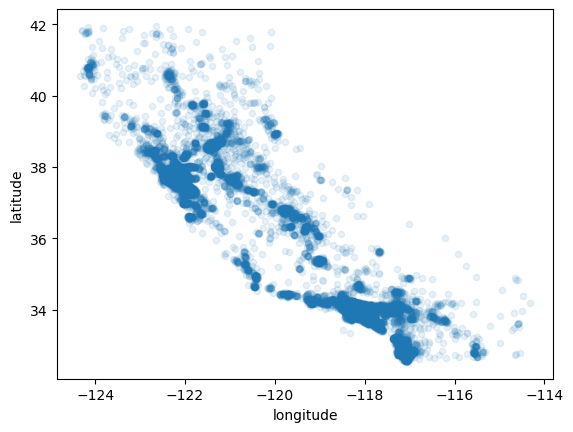

In [22]:
#Create a scatter splot since there is geographical information 
housing.plot(kind="scatter", x ="longitude", y="latitude", alpha = 0.1)